In [321]:
import pandas as pd

data_4_1a = pd.read_csv('assignment4.1a.csv', parse_dates=['Date'])

data_4_1a.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [322]:
data_4_1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   StoreCode      int64         
 2   ProductCode    int64         
 3   SalesQuantity  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 57.2 MB


In [323]:
promotion_dates = pd.read_csv('PromotionDates.csv', parse_dates=['StartDate', 'EndDate'])

promotion_dates.head()


,Period,StartDate,EndDate
0,Promo1,2015-02-10,2015-02-17
1,Promo2,2015-03-15,2015-03-22
2,Promo3,2015-05-24,2015-06-01
3,Promo4,2015-06-21,2015-06-28
4,Promo5,2015-09-01,2015-09-06


In [324]:
# get first 4 promo
promo_periods = promotion_dates.iloc[:4].copy()

# dummy init for is_promo column
data_4_1a['Is_Promotion'] = 0

# mark with 1 if promo, else 0
for _, row in promo_periods.iterrows():
    mask = (data_4_1a['Date'] >= row['StartDate']) & (data_4_1a['Date'] <= row['EndDate'])
    data_4_1a.loc[mask, 'Is_Promotion'] = 1

data_4_1a.head()


,Date,StoreCode,ProductCode,SalesQuantity,Is_Promotion
0,2015-01-01,8,9,-1,0
1,2015-01-01,131,9,1,0
2,2015-01-01,144,9,2,0
3,2015-01-01,203,9,2,0
4,2015-01-01,256,9,0,0


In [325]:
data_4_1a['Is_Promotion'].value_counts()

0    1562695
1     310923
Name: Is_Promotion, dtype: int64

In [326]:
non_promo_sales = data_4_1a[data_4_1a['Is_Promotion'] == 0]
non_promo_sales

,Date,StoreCode,ProductCode,SalesQuantity,Is_Promotion
0,2015-01-01,8,9,-1,0
1,2015-01-01,131,9,1,0
2,2015-01-01,144,9,2,0
3,2015-01-01,203,9,2,0
4,2015-01-01,256,9,0,0
...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0
1873614,2015-07-31,12,315,1,0
1873615,2015-07-31,104,315,1,0
1873616,2015-07-31,261,315,1,0


In [327]:
non_promo_sales[(non_promo_sales['StoreCode'] == 1) & (non_promo_sales['Date'] == '2015-01-02')]


,Date,StoreCode,ProductCode,SalesQuantity,Is_Promotion
325882,2015-01-02,1,40,1,0
349134,2015-01-02,1,85,1,0
461458,2015-01-02,1,126,-1,0
468166,2015-01-02,1,186,24,0
491985,2015-01-02,1,157,2,0
509752,2015-01-02,1,97,5,0
668346,2015-01-02,1,138,1,0
723963,2015-01-02,1,149,1,0
761401,2015-01-02,1,168,8,0
998005,2015-01-02,1,190,24,0


In [328]:
df = non_promo_sales.groupby(['StoreCode','Date'])['SalesQuantity'].sum()

In [329]:
df

StoreCode  Date      
1          2015-01-01     1
           2015-01-02    97
           2015-01-03     4
           2015-01-04    16
           2015-01-05    89
                         ..
340        2015-07-26    23
           2015-07-27    66
           2015-07-28    71
           2015-07-29    52
           2015-07-31    26
Name: SalesQuantity, Length: 58402, dtype: int64

In [330]:
df = df.reset_index()

In [331]:
df

,StoreCode,Date,SalesQuantity
0,1,2015-01-01,1
1,1,2015-01-02,97
2,1,2015-01-03,4
3,1,2015-01-04,16
4,1,2015-01-05,89
...,...,...,...
58397,340,2015-07-26,23
58398,340,2015-07-27,66
58399,340,2015-07-28,71
58400,340,2015-07-29,52


In [332]:
# resample by week
weekly_sales = (df.groupby('StoreCode')
                 .resample('W-Mon', on='Date')
                 .sum()
                 .drop('StoreCode', axis=1) 
                 .reset_index())

print(weekly_sales)


       StoreCode       Date  SalesQuantity
0              1 2015-01-05            207
1              1 2015-01-12            436
2              1 2015-01-19            314
3              1 2015-01-26            368
4              1 2015-02-02            569
...          ...        ...            ...
10258        340 2015-07-06            533
10259        340 2015-07-13            548
10260        340 2015-07-20            550
10261        340 2015-07-27            386
10262        340 2015-08-03            149

[10263 rows x 3 columns]


In [333]:
weekly_sales.set_index(['StoreCode', 'Date'], inplace=True)

In [334]:
weekly_sales

SalesQuantity
StoreCode Date                     
1         2015-01-05            207
          2015-01-12            436
          2015-01-19            314
          2015-01-26            368
          2015-02-02            569
...                             ...
340       2015-07-06            533
          2015-07-13            548
          2015-07-20            550
          2015-07-27            386
          2015-08-03            149

[10263 rows x 1 columns]

In [335]:
avg_weekly_sales_store = weekly_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()
avg_weekly_sales_store

,StoreCode,SalesQuantity
0,1,334.645161
1,2,1089.225806
2,3,218.806452
3,4,337.387097
4,5,274.483871
...,...,...
335,336,285.032258
336,337,369.580645
337,338,310.741935
338,339,434.161290


In [336]:
from sklearn.cluster import KMeans

In [337]:
avg_weekly_sales_store[['SalesQuantity']]

,SalesQuantity
0,334.645161
1,1089.225806
2,218.806452
3,337.387097
4,274.483871
...,...
335,285.032258
336,369.580645
337,310.741935
338,434.161290


In [338]:
# init K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

In [339]:
avg_weekly_sales_store['Cluster'] = kmeans.fit_predict(avg_weekly_sales_store[['SalesQuantity']])

In [340]:
avg_weekly_sales_store

,StoreCode,SalesQuantity,Cluster
0,1,334.645161,1
1,2,1089.225806,2
2,3,218.806452,1
3,4,337.387097,1
4,5,274.483871,1
...,...,...,...
335,336,285.032258,1
336,337,369.580645,0
337,338,310.741935,1
338,339,434.161290,0


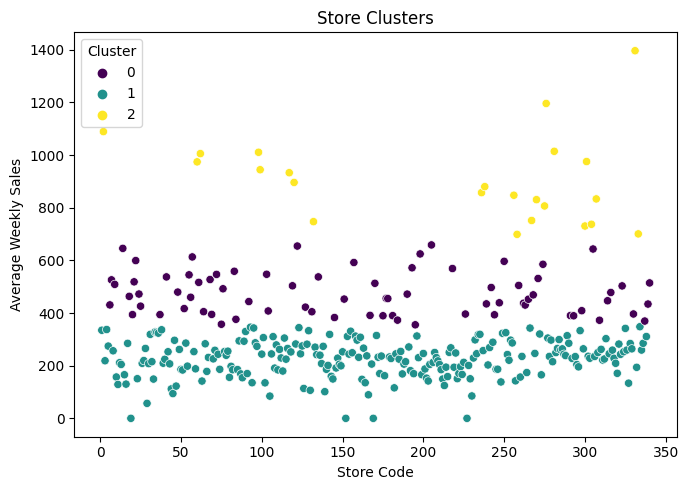

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(data=avg_weekly_sales_store, x='StoreCode', y='SalesQuantity', hue='Cluster', palette='viridis', ax=ax)
ax.set_title('Store Clusters')
ax.set_xlabel('Store Code')
ax.set_ylabel('Average Weekly Sales')

plt.tight_layout()
plt.show()


In [343]:
avg_weekly_sales_store = weekly_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

In [344]:
lower_threshold = avg_weekly_sales_store['SalesQuantity'].quantile(0.333)
upper_threshold = avg_weekly_sales_store['SalesQuantity'].quantile(0.666)

def label_store(x):
    if x < lower_threshold:
        return "Slow Store"
    elif x < upper_threshold:
        return "Medium Store"
    else:
        return "Fast Store"

avg_weekly_sales_store['StoreType'] = avg_weekly_sales_store['SalesQuantity'].apply(label_store)

print(avg_weekly_sales_store)

     StoreCode  SalesQuantity     StoreType
0            1     334.645161    Fast Store
1            2    1089.225806    Fast Store
2            3     218.806452    Slow Store
3            4     337.387097    Fast Store
4            5     274.483871  Medium Store
..         ...            ...           ...
335        336     285.032258  Medium Store
336        337     369.580645    Fast Store
337        338     310.741935  Medium Store
338        339     434.161290    Fast Store
339        340     514.387097    Fast Store

[340 rows x 3 columns]


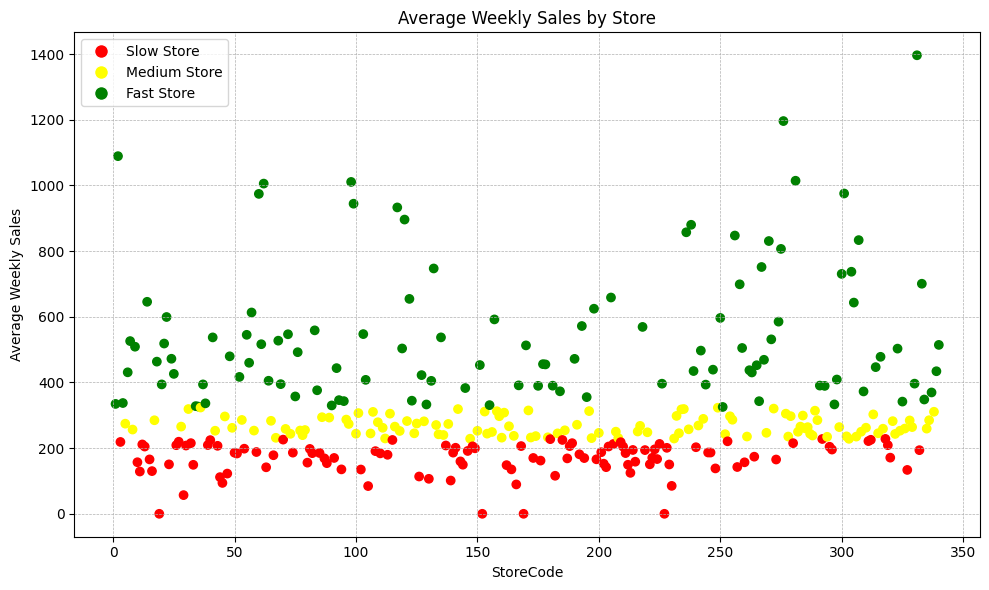

In [345]:
import matplotlib.pyplot as plt

colors = {
    'Slow Store': 'red',
    'Medium Store': 'yellow',
    'Fast Store': 'green'
}

plt.figure(figsize=(10, 6))
plt.scatter(
    avg_weekly_sales_store['StoreCode'], 
    avg_weekly_sales_store['SalesQuantity'], 
    c=avg_weekly_sales_store['StoreType'].map(colors),
    label=avg_weekly_sales_store['StoreType']
)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Slow Store', markersize=10, markerfacecolor='red'),
    Line2D([0], [0], marker='o', color='w', label='Medium Store', markersize=10, markerfacecolor='yellow'),
    Line2D([0], [0], marker='o', color='w', label='Fast Store', markersize=10, markerfacecolor='green')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.title('Average Weekly Sales by Store')
plt.xlabel('StoreCode')
plt.ylabel('Average Weekly Sales')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [346]:
df = non_promo_sales.groupby(['ProductCode','Date'])['SalesQuantity'].sum()

In [347]:
df

ProductCode  Date      
1            2015-01-01    17
             2015-01-02    70
             2015-01-03    31
             2015-01-04    85
             2015-01-05    33
                           ..
317          2015-07-26     0
             2015-07-27     3
             2015-07-28     3
             2015-07-29     0
             2015-07-30     0
Name: SalesQuantity, Length: 47122, dtype: int64

In [348]:
# resample by week
df = df.reset_index()

weekly_sales = (df.groupby('ProductCode')
                 .resample('W-Mon', on='Date')
                 .sum()
                 .drop('ProductCode', axis=1)
                 .reset_index())

print(weekly_sales)


      ProductCode       Date  SalesQuantity
0               1 2015-01-05            236
1               1 2015-01-12            370
2               1 2015-01-19            349
3               1 2015-01-26            311
4               1 2015-02-02            363
...           ...        ...            ...
9168          317 2015-07-06              9
9169          317 2015-07-13             20
9170          317 2015-07-20             14
9171          317 2015-07-27             13
9172          317 2015-08-03              3

[9173 rows x 3 columns]


In [349]:
weekly_sales.set_index(['ProductCode', 'Date'], inplace=True)
weekly_sales

SalesQuantity
ProductCode Date                     
1           2015-01-05            236
            2015-01-12            370
            2015-01-19            349
            2015-01-26            311
            2015-02-02            363
...                               ...
317         2015-07-06              9
            2015-07-13             20
            2015-07-20             14
            2015-07-27             13
            2015-08-03              3

[9173 rows x 1 columns]

In [350]:
avg_weekly_sales_product = weekly_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()
avg_weekly_sales_product

,ProductCode,SalesQuantity
0,1,304.354839
1,2,229.483871
2,3,166.870968
3,4,203.870968
4,5,246.032258
...,...,...
311,313,337.222222
312,314,21.645161
313,315,14.903226
314,316,31.419355


In [351]:
kmeans = KMeans(n_clusters=3, random_state=42)
avg_weekly_sales_product['Cluster'] = kmeans.fit_predict(avg_weekly_sales_product[['SalesQuantity']])

In [352]:
avg_weekly_sales_product[avg_weekly_sales_product['Cluster'] == 0]

,ProductCode,SalesQuantity,Cluster
140,141,759.709677,0
141,142,1011.129032,0
144,145,712.241379,0
168,169,818.161290,0
169,170,2078.322581,0
170,171,806.428571,0
171,172,961.750000,0
183,184,1046.677419,0
184,185,1072.290323,0
185,186,922.677419,0


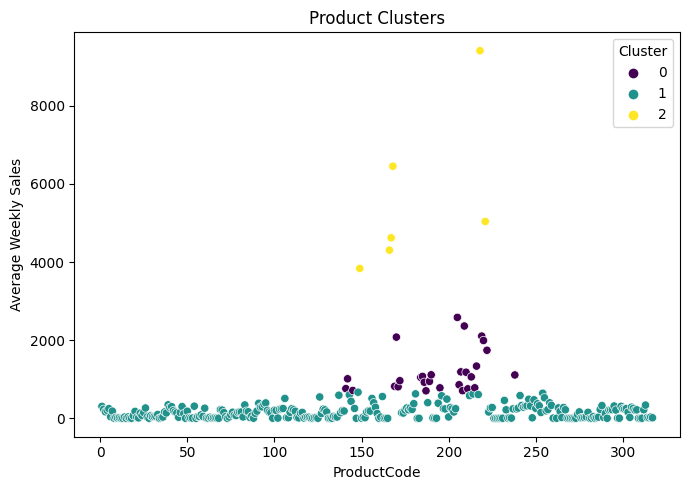

In [355]:
import seaborn as sns# Visualizing the clusters for products and stores
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(data=avg_weekly_sales_product, x='ProductCode', y='SalesQuantity', hue='Cluster', palette='viridis', ax=ax)
ax.set_title('Product Clusters')
ax.set_xlabel('ProductCode')
ax.set_ylabel('Average Weekly Sales')

plt.tight_layout()
plt.show()


In [356]:
lower_threshold = avg_weekly_sales_product['SalesQuantity'].quantile(0.333)
upper_threshold = avg_weekly_sales_product['SalesQuantity'].quantile(0.666)

def label_product(x):
    if x < lower_threshold:
        return "Slow Product"
    elif x < upper_threshold:
        return "Medium Product"
    else:
        return "Fast Product"

avg_weekly_sales_product['ProductType'] = avg_weekly_sales_product['SalesQuantity'].apply(label_product)

print(avg_weekly_sales_product)

     ProductCode  SalesQuantity  Cluster     ProductType
0              1     304.354839        1    Fast Product
1              2     229.483871        1  Medium Product
2              3     166.870968        1  Medium Product
3              4     203.870968        1  Medium Product
4              5     246.032258        1    Fast Product
..           ...            ...      ...             ...
311          313     337.222222        1    Fast Product
312          314      21.645161        1    Slow Product
313          315      14.903226        1    Slow Product
314          316      31.419355        1    Slow Product
315          317      12.580645        1    Slow Product

[316 rows x 4 columns]


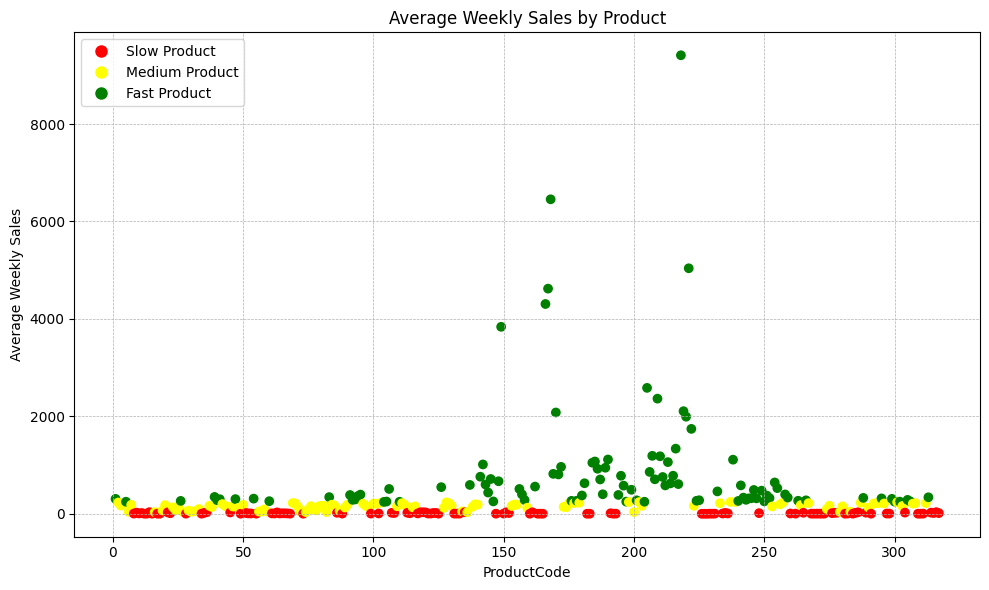

In [357]:
import matplotlib.pyplot as plt

colors = {
    'Slow Product': 'red',
    'Medium Product': 'yellow',
    'Fast Product': 'green'
}

plt.figure(figsize=(10, 6))
plt.scatter(
    avg_weekly_sales_product['ProductCode'], 
    avg_weekly_sales_product['SalesQuantity'], 
    c=avg_weekly_sales_product['ProductType'].map(colors),
    label=avg_weekly_sales_product['ProductType']
)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Slow Product', markersize=10, markerfacecolor='red'),
    Line2D([0], [0], marker='o', color='w', label='Medium Product', markersize=10, markerfacecolor='yellow'),
    Line2D([0], [0], marker='o', color='w', label='Fast Product', markersize=10, markerfacecolor='green')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.title('Average Weekly Sales by Product')
plt.xlabel('ProductCode')
plt.ylabel('Average Weekly Sales')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [358]:
data_4_1a

,Date,StoreCode,ProductCode,SalesQuantity,Is_Promotion
0,2015-01-01,8,9,-1,0
1,2015-01-01,131,9,1,0
2,2015-01-01,144,9,2,0
3,2015-01-01,203,9,2,0
4,2015-01-01,256,9,0,0
...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0
1873614,2015-07-31,12,315,1,0
1873615,2015-07-31,104,315,1,0
1873616,2015-07-31,261,315,1,0


In [359]:
# average sales during promotion and non-promotion periods
item_sales_diff = (
    data_4_1a.groupby(['ProductCode', 'Is_Promotion'])['SalesQuantity']
    .mean()
    .reset_index()
    .pivot(index='ProductCode', columns='Is_Promotion', values='SalesQuantity')
    .fillna(0)
)
item_sales_diff.columns = ['AvgSales_NoPromo', 'AvgSales_Promo']
item_sales_diff['SalesDiff_Items'] = item_sales_diff['AvgSales_Promo'] - item_sales_diff['AvgSales_NoPromo']


In [360]:
item_sales_diff

,AvgSales_NoPromo,AvgSales_Promo,SalesDiff_Items
ProductCode,,,
1,2.383780,2.421702,0.037922
2,2.201114,2.340223,0.139109
3,1.763122,2.000000,0.236878
4,2.153322,2.175747,0.022425
5,1.979496,2.365607,0.386110
...,...,...,...
313,2.226706,2.380198,0.153492
314,0.581456,0.565041,-0.016415
315,0.439581,0.502222,0.062641


In [361]:
max_sales_increase_item = item_sales_diff['SalesDiff_Items'].idxmax()

print(f'Biggest increase in sales during promo:{max_sales_increase_item}')

Biggest increase in sales during promo:218


In [362]:
item_sales_diff.loc[max_sales_increase_item]

AvgSales_NoPromo     9.49777
AvgSales_Promo      13.89674
SalesDiff_Items      4.39897
Name: 218, dtype: float64

In [363]:
# average sales during promotion and non-promotion periods for each store
store_sales_diff = (
    data_4_1a.groupby(['StoreCode', 'Is_Promotion'])['SalesQuantity']
    .mean()
    .reset_index()
    .pivot(index='StoreCode', columns='Is_Promotion', values='SalesQuantity')
    .fillna(0)
)
store_sales_diff.columns = ['AvgSales_NoPromo', 'AvgSales_Promo']
store_sales_diff['SalesDiff_Stores'] = store_sales_diff['AvgSales_Promo'] - store_sales_diff['AvgSales_NoPromo']


In [364]:
store_sales_diff

,AvgSales_NoPromo,AvgSales_Promo,SalesDiff_Stores
StoreCode,,,
1,2.159450,2.288083,0.128632
2,3.186674,3.703431,0.516757
3,1.686474,1.870460,0.183986
4,1.953858,2.844894,0.891036
5,1.717602,1.767463,0.049861
...,...,...,...
336,1.726118,1.919039,0.192921
337,2.002622,2.830131,0.827510
338,1.961116,2.373150,0.412034


In [365]:
max_sales_increase_store = store_sales_diff['SalesDiff_Stores'].idxmax()

(f'Stores with Higher Promotion Reaction:{max_sales_increase_store}', store_sales_diff.loc[max_sales_increase_store])


('Stores with Higher Promotion Reaction:92',
 AvgSales_NoPromo    1.846047
 AvgSales_Promo      4.760684
 SalesDiff_Stores    2.914637
 Name: 92, dtype: float64)

#### a. Criteria for Separating Items (Fast, Medium, Slow)
Criterion: Average Weekly Sales Per Store (during non-promotion periods).
Rationale: Products with higher average weekly sales per store are likely to be popular or essential items, leading them to be classified as "Fast". Conversely, products with lower average sales are "Slow" as they might be niche or less essential. 

#### b. Criteria for Separating Stores (High, Medium, Low Performing)
Criterion: Total Sales Per Store (over the entire period).
Rationale: Stores with higher total sales are likely to be in favorable locations or manage their operations effectively, classifying them as "High" performing. Lower total sales may indicate less foot traffic or less effective management, marking them as "Low" performing.

In [366]:
promo_data = pd.read_csv("PromotionDates.csv")
promo_data.head()

sales_data = pd.read_csv('assignment4.1a.csv', parse_dates=['Date'])

In [367]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
promo_data['StartDate'] = pd.to_datetime(promo_data['StartDate'])
promo_data['EndDate'] = pd.to_datetime(promo_data['EndDate'])

sales_data['PromoPeriod'] = "NoPromo"

for idx, row in promo_data.iterrows():
    mask = (sales_data['Date'] >= row['StartDate']) & (sales_data['Date'] <= row['EndDate'])
    sales_data.loc[mask, 'PromoPeriod'] = row['Period']

sales_data.head()


,Date,StoreCode,ProductCode,SalesQuantity,PromoPeriod
0,2015-01-01,8,9,-1,NoPromo
1,2015-01-01,131,9,1,NoPromo
2,2015-01-01,144,9,2,NoPromo
3,2015-01-01,203,9,2,NoPromo
4,2015-01-01,256,9,0,NoPromo


In [368]:
average_sales_by_promo = sales_data.groupby('PromoPeriod')['SalesQuantity'].mean()

average_sales_by_promo


PromoPeriod
NoPromo    2.175385
Promo1     2.433998
Promo2     2.599991
Promo3     2.698051
Promo4     2.708934
Name: SalesQuantity, dtype: float64

From this, we can see that sales quantities tend to be higher during promotional periods compared to non-promotional periods. However, to determine the biggest effect explaining sales change during promotions, we might need to take other factors into account, such as the specific store or product.



In [369]:
avg_weekly_sales_product[avg_weekly_sales_product['Cluster'] == 2] # FAST ITEMS

,ProductCode,SalesQuantity,Cluster,ProductType
148,149,3837.258065,2,Fast Product
165,166,4305.645161,2,Fast Product
166,167,4621.000000,2,Fast Product
167,168,6455.258065,2,Fast Product
217,218,9412.903226,2,Fast Product
220,221,5039.225806,2,Fast Product


In [370]:
sales_data[sales_data["PromoPeriod"] != 'NoPromo']

,Date,StoreCode,ProductCode,SalesQuantity,PromoPeriod
507,2015-02-10,6,9,0,Promo1
508,2015-02-10,14,9,0,Promo1
509,2015-02-10,28,9,0,Promo1
510,2015-02-10,45,9,1,Promo1
511,2015-02-10,47,9,1,Promo1
...,...,...,...,...,...
1873469,2015-06-28,20,315,0,Promo4
1873470,2015-06-28,30,315,0,Promo4
1873471,2015-06-28,77,315,0,Promo4
1873472,2015-06-28,92,315,0,Promo4


In [371]:
sales_data[sales_data["PromoPeriod"] != 'NoPromo'].groupby('ProductCode')['SalesQuantity'].sum()

ProductCode
1      1964
2      1472
3      1254
4      1238
5      1637
       ... 
313    1202
314     139
315     113
316     215
317     121
Name: SalesQuantity, Length: 301, dtype: int64

In [372]:
fast_item_dict_non_promo = avg_weekly_sales_product[avg_weekly_sales_product['Cluster'] == 2].set_index('ProductCode').to_dict()['SalesQuantity']

In [275]:
fast_item_dict_non_promo #Key: ProductID, Value: SalesQuantity

{149: 3837.2580645161293,
 166: 4305.645161290323,
 167: 4621.0,
 168: 6455.258064516129,
 218: 9412.90322580645,
 221: 5039.225806451613}

In [373]:
non_promo_sales

,Date,StoreCode,ProductCode,SalesQuantity,Is_Promotion
0,2015-01-01,8,9,-1,0
1,2015-01-01,131,9,1,0
2,2015-01-01,144,9,2,0
3,2015-01-01,203,9,2,0
4,2015-01-01,256,9,0,0
...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0
1873614,2015-07-31,12,315,1,0
1873615,2015-07-31,104,315,1,0
1873616,2015-07-31,261,315,1,0


In [374]:
non_promo_dict = non_promo_sales.groupby("ProductCode")['SalesQuantity'].sum().to_dict()

In [375]:
len(non_promo_sales.groupby("Date").count())

179

In [376]:
non_promo_dict

{1: 9435,
 2: 7114,
 3: 5173,
 4: 6320,
 5: 7627,
 6: 1215,
 7: 5652,
 8: 46,
 9: 686,
 10: 21,
 11: 421,
 12: 5,
 13: 6,
 14: 969,
 15: 9,
 16: 995,
 17: 20,
 18: 14,
 19: 2064,
 20: 4054,
 21: 841,
 22: 178,
 23: 4078,
 24: 2236,
 25: 4579,
 26: 8147,
 27: 1000,
 28: 3,
 29: 1991,
 30: 1236,
 31: 1454,
 32: 1639,
 33: 2983,
 34: 20,
 35: 508,
 36: 966,
 37: 5026,
 38: 4260,
 39: 10672,
 40: 8584,
 41: 9194,
 42: 6116,
 43: 4999,
 44: 4283,
 45: 795,
 46: 4555,
 47: 9292,
 48: 3640,
 49: 0,
 50: 5592,
 51: 449,
 52: 194,
 53: 149,
 54: 9593,
 55: 7,
 56: 1356,
 57: 1354,
 58: 2723,
 59: 1479,
 60: 7981,
 61: 188,
 62: 130,
 63: 821,
 64: 153,
 65: 264,
 66: 241,
 67: 167,
 68: 26,
 69: 6794,
 70: 6483,
 71: 4518,
 72: 1293,
 73: 4,
 74: 1023,
 75: 2765,
 76: 4794,
 77: 2549,
 78: 2120,
 79: 4682,
 80: 5033,
 81: 4955,
 82: 1039,
 83: 10566,
 84: 5699,
 85: 5162,
 86: 576,
 87: 1835,
 88: 53,
 89: 3943,
 90: 5720,
 91: 11894,
 92: 8822,
 93: 9095,
 94: 11202,
 95: 12176,
 96: 6339,
 97

In [377]:
promo_sales = data_4_1a[data_4_1a['Is_Promotion'] == 1]
promo_sales

,Date,StoreCode,ProductCode,SalesQuantity,Is_Promotion
507,2015-02-10,6,9,0,1
508,2015-02-10,14,9,0,1
509,2015-02-10,28,9,0,1
510,2015-02-10,45,9,1,1
511,2015-02-10,47,9,1,1
...,...,...,...,...,...
1873469,2015-06-28,20,315,0,1
1873470,2015-06-28,30,315,0,1
1873471,2015-06-28,77,315,0,1
1873472,2015-06-28,92,315,0,1


In [378]:
promo_dict = promo_sales.groupby("ProductCode")['SalesQuantity'].sum().to_dict()

In [379]:
promo_dict

{1: 1964,
 2: 1472,
 3: 1254,
 4: 1238,
 5: 1637,
 6: 260,
 7: 1248,
 8: 12,
 9: 128,
 11: 106,
 12: 0,
 13: 3,
 14: 232,
 16: 227,
 18: 2,
 19: 469,
 20: 878,
 21: 209,
 22: 47,
 23: 905,
 24: 564,
 25: 998,
 26: 1940,
 27: 238,
 29: 453,
 30: 369,
 31: 292,
 32: 331,
 33: 598,
 34: 6,
 35: 86,
 36: 152,
 37: 999,
 38: 845,
 39: 2152,
 40: 1875,
 41: 1934,
 42: 1143,
 43: 979,
 44: 987,
 45: 156,
 46: 992,
 47: 2101,
 48: 892,
 50: 1382,
 51: 103,
 52: 46,
 53: 38,
 54: 2312,
 55: 1,
 56: 274,
 57: 316,
 58: 502,
 59: 370,
 60: 1702,
 61: 51,
 62: 31,
 63: 193,
 64: 42,
 65: 62,
 66: 82,
 67: 47,
 68: 5,
 69: 1536,
 70: 1620,
 71: 1039,
 72: 266,
 73: 1,
 74: 175,
 75: 577,
 76: 987,
 77: 518,
 78: 436,
 79: 962,
 80: 1122,
 81: 1117,
 82: 221,
 83: 2219,
 84: 1236,
 85: 1052,
 86: 109,
 87: 415,
 88: 13,
 89: 828,
 90: 1088,
 91: 2549,
 92: 1948,
 93: 2159,
 94: 2397,
 95: 2677,
 96: 1384,
 97: 1129,
 98: 985,
 99: 23,
 100: 1524,
 101: 909,
 102: 23,
 103: 1417,
 104: 1777,
 105: 16

In [380]:
len(promo_sales.groupby("Date").count())

33

In [381]:
for i,_ in fast_item_dict_non_promo.items():
    if i in promo_dict:
        print(f'For FAST item {i} -> AVG Promo Sale: {promo_dict[i]/33}, AVG Non-Promo Sale: {non_promo_dict[i]/179}')

For FAST item 149 -> AVG Promo Sale: 711.5454545454545, AVG Non-Promo Sale: 664.5530726256983
For FAST item 166 -> AVG Promo Sale: 818.4848484848485, AVG Non-Promo Sale: 745.6703910614525
For FAST item 167 -> AVG Promo Sale: 896.3333333333334, AVG Non-Promo Sale: 800.2849162011173
For FAST item 168 -> AVG Promo Sale: 1202.090909090909, AVG Non-Promo Sale: 1117.9497206703911
For FAST item 218 -> AVG Promo Sale: 2544.787878787879, AVG Non-Promo Sale: 1630.167597765363
For FAST item 221 -> AVG Promo Sale: 1325.5454545454545, AVG Non-Promo Sale: 872.7150837988827


In [382]:
slow_item_dict_non_promo = avg_weekly_sales_product[avg_weekly_sales_product['Cluster'] == 1].set_index('ProductCode').to_dict()['SalesQuantity']

In [384]:
slow_item_dict_non_promo # SLOW ITEMS

{1: 304.35483870967744,
 2: 229.48387096774192,
 3: 166.8709677419355,
 4: 203.8709677419355,
 5: 246.03225806451613,
 6: 39.193548387096776,
 7: 182.32258064516128,
 8: 2.7058823529411766,
 9: 22.129032258064516,
 10: 5.25,
 11: 13.580645161290322,
 12: 0.16666666666666666,
 13: 0.20689655172413793,
 14: 31.258064516129032,
 15: 0.32142857142857145,
 16: 32.096774193548384,
 17: 0.7407407407407407,
 18: 0.5384615384615384,
 19: 66.58064516129032,
 20: 176.2608695652174,
 21: 27.129032258064516,
 22: 9.88888888888889,
 23: 131.5483870967742,
 24: 72.12903225806451,
 25: 147.70967741935485,
 26: 262.80645161290323,
 27: 32.25806451612903,
 28: 0.75,
 29: 64.2258064516129,
 30: 39.87096774193548,
 31: 46.903225806451616,
 32: 52.87096774193548,
 33: 96.2258064516129,
 34: 0.6666666666666666,
 35: 16.387096774193548,
 36: 31.161290322580644,
 37: 162.1290322580645,
 38: 137.41935483870967,
 39: 344.258064516129,
 40: 276.9032258064516,
 41: 296.5806451612903,
 42: 197.29032258064515,
 43:

In [385]:
for i,_ in slow_item_dict_non_promo.items():
    if i in promo_dict:
        print(f'For slow item {i} -> AVG Promo Sale: {promo_dict[i]/33}, AVG Non-Promo Sale: {non_promo_dict[i]/179}')

For slow item 1 -> AVG Promo Sale: 59.515151515151516, AVG Non-Promo Sale: 52.70949720670391
For slow item 2 -> AVG Promo Sale: 44.60606060606061, AVG Non-Promo Sale: 39.74301675977654
For slow item 3 -> AVG Promo Sale: 38.0, AVG Non-Promo Sale: 28.899441340782122
For slow item 4 -> AVG Promo Sale: 37.515151515151516, AVG Non-Promo Sale: 35.3072625698324
For slow item 5 -> AVG Promo Sale: 49.60606060606061, AVG Non-Promo Sale: 42.608938547486034
For slow item 6 -> AVG Promo Sale: 7.878787878787879, AVG Non-Promo Sale: 6.787709497206704
For slow item 7 -> AVG Promo Sale: 37.81818181818182, AVG Non-Promo Sale: 31.575418994413408
For slow item 8 -> AVG Promo Sale: 0.36363636363636365, AVG Non-Promo Sale: 0.2569832402234637
For slow item 9 -> AVG Promo Sale: 3.878787878787879, AVG Non-Promo Sale: 3.8324022346368714
For slow item 11 -> AVG Promo Sale: 3.212121212121212, AVG Non-Promo Sale: 2.35195530726257
For slow item 12 -> AVG Promo Sale: 0.0, AVG Non-Promo Sale: 0.027932960893854747
For